In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Divorce classification/prediction

### Load the data

In [2]:
data = pd.read_csv('marriage.csv', header=None)

In [3]:
X = data.drop(54, axis=1) # attributes
y = data.loc[:,54] # labels

### Logistic regression classifier

In [4]:
num_trials = 100
acc_LR = np.zeros(num_trials)
for trial in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
    model_LR = LogisticRegression().fit(X_train, y_train)
    labels_LR = model_LR.predict(X_test)
    acc_LR[trial] = accuracy_score(y_test, labels_LR) * 100
    
print("Average (test) accuracy for Logistic Regression classifier: %0.2f%% " % np.average(acc_LR))

Average (test) accuracy for Logistic Regression classifier: 97.91% 


### Naive Bayes classifier

In [5]:
acc_NB = np.zeros(num_trials)
for trial in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
    model_NB = GaussianNB().fit(X_train, y_train)
    labels_NB = model_NB.predict(X_test)
    acc_NB[trial] = accuracy_score(y_test, labels_NB) * 100
    
print("Average (test) accuracy for Naive Bayes classifier: %0.2f%% " % np.average(acc_NB))

Average (test) accuracy for Naive Bayes classifier: 97.97% 


### k Nearest Neighbor classifier

In [6]:
k = 25
acc_KNN = np.zeros(num_trials)
for trial in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
    model_KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    labels_KNN = model_KNN.predict(X_test)
    acc_KNN[trial] = accuracy_score(y_test, labels_KNN) * 100
    
print("Average (test) accuracy for %d Nearest Neighbor classifier: %0.2f%% " % (k, np.average(acc_KNN)))

Average (test) accuracy for 25 Nearest Neighbor classifier: 97.97% 


### perform PCA on original data and map it to 2 dimensional space

In [7]:
X_r = PCA(n_components=2).fit_transform(X)

### Plot the data points and decision boundary of each classifier

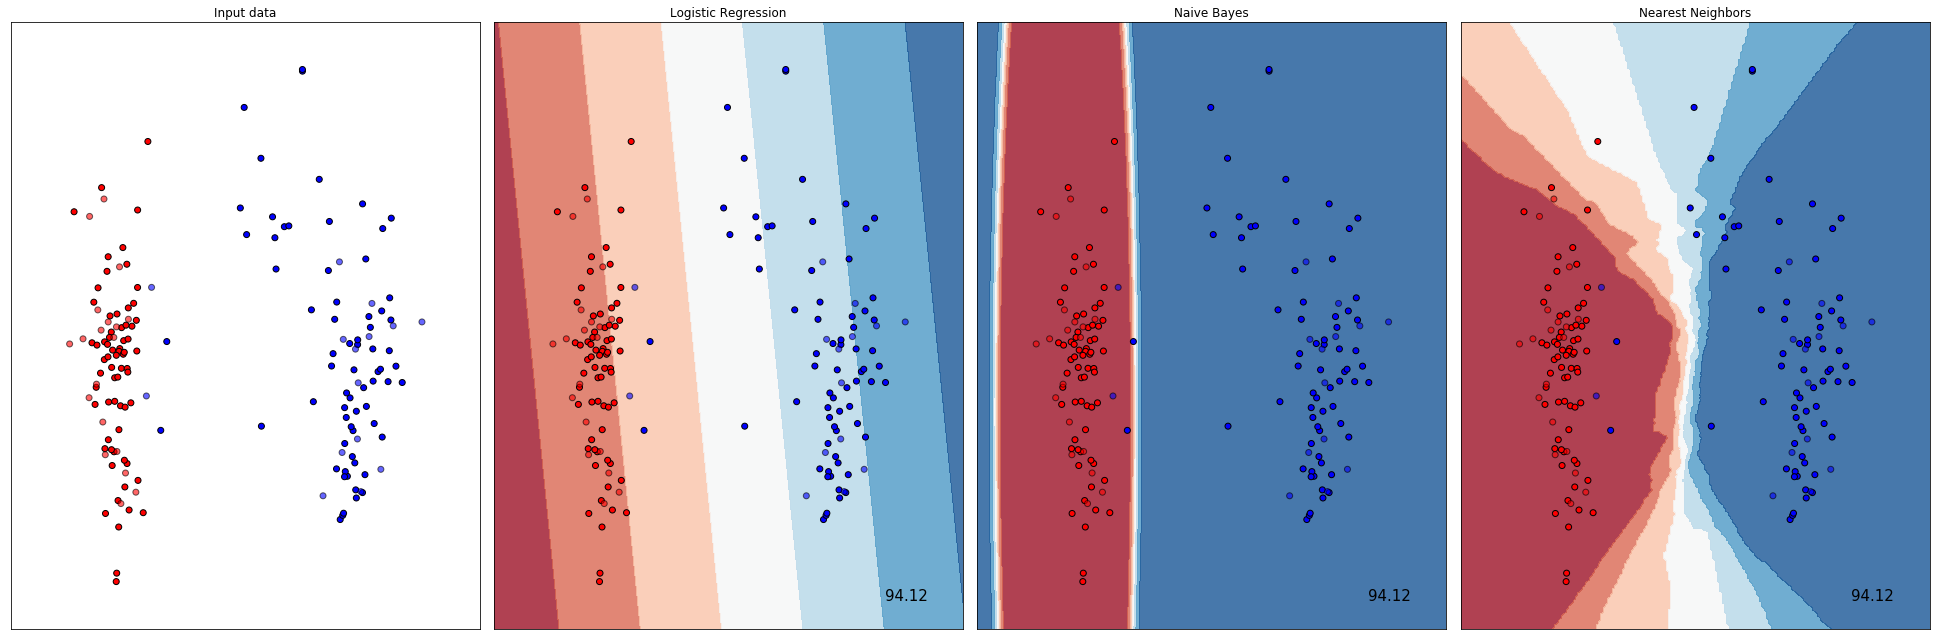

In [8]:
h = .02  # step size in the mesh

names = ["Logistic Regression", 
         "Naive Bayes", 
         "Nearest Neighbors"]

classifiers = [
    LogisticRegression(random_state=0),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=k)]


linearly_separable = (X_r, y)

datasets = [linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=1)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % (100*score)).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Handwritten digits classification

### Load the data

In [9]:
# from pandas.compat import StringIO
MNIST_data = pd.read_csv('data.dat', sep=r'\s\s+', header=None, engine='python')
MNIST_data = pd.DataFrame.transpose(MNIST_data)

MNIST_labels = pd.read_csv('label.dat', header=None, sep='\s\s+', engine='python')
MNIST_labels = pd.DataFrame.transpose(MNIST_labels)
MNIST_labels[MNIST_labels==2]=0
MNIST_labels[MNIST_labels==6]=1

In [10]:
X = MNIST_data[:]
y = MNIST_labels[:]
y = y.values.ravel()

### Logistic Regression classifier

In [11]:
num_trials = 100
acc_LR = np.zeros(num_trials)
for trial in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
    model_LR = LogisticRegression().fit(X_train, y_train)
    labels_LR = model_LR.predict(X_test)
    acc_LR[trial] = accuracy_score(y_test, labels_LR) * 100
    
print("Average (test) accuracy for Logistic Regression classifier: %0.2f%% " % np.average(acc_LR))

Average (test) accuracy for Logistic Regression classifier: 97.84% 


### Naive Bayes classifier

In [12]:
acc_NB = np.zeros(num_trials)
for trial in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
    model_NB = GaussianNB().fit(X_train, y_train)
    labels_NB = model_NB.predict(X_test)
    acc_NB[trial] = accuracy_score(y_test, labels_NB) * 100
    
print("Average (test) accuracy for Naive Bayes classifier: %0.2f%% " % np.average(acc_NB))

Average (test) accuracy for Naive Bayes classifier: 78.60% 


### k Nearest Neighbor classifier

In [13]:
k = 25
acc_KNN = np.zeros(num_trials)
for trial in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=trial)
    model_KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    labels_KNN = model_KNN.predict(X_test)
    acc_KNN[trial] = accuracy_score(y_test, labels_KNN) * 100
    
print("Average (test) accuracy for %d Nearest Neighbor classifier: %0.2f%% " % (k, np.average(acc_KNN)))

Average (test) accuracy for 25 Nearest Neighbor classifier: 99.08% 


### perform PCA on original data and map it to 2 dimensional space

In [14]:
X_r = PCA(n_components=2).fit_transform(X)

### Plot the data points and decision boundary of each classifier

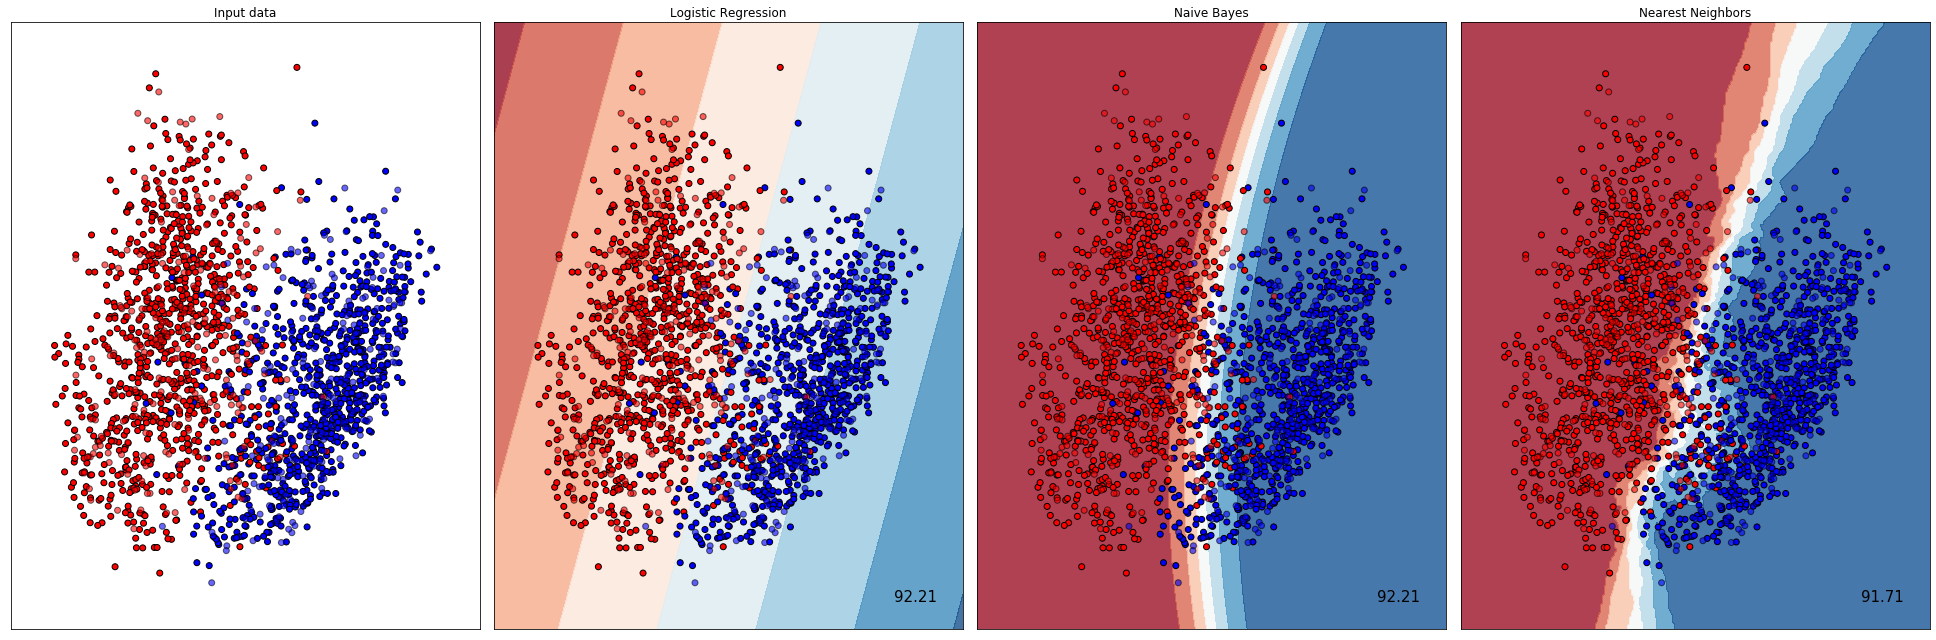

In [15]:
h = .02  # step size in the mesh

names = ["Logistic Regression", 
         "Naive Bayes", 
         "Nearest Neighbors"]

classifiers = [
    LogisticRegression(random_state=0),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors=k)]


linearly_separable = (X_r, y)

datasets = [linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=2020)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % (100*score)).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()